# Исследование объявлений о продаже квартир

Этот проект был написан 26.02.24

Взяты данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Данные собрананы как вручную так и автоматически.

Необходимо:
+ Провести предобработку данных
+ Провести исследовательский анализ данных
+ Определить рыночную стоимость объектов недвижимости. 
+ Определить зависимости между ценой и характеристиками квартир
+ Определить наиболее и наименее прибыльные условия продажи квартир

## Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
pd.set_option('mode.chained_assignment', None)
pd.options.display.float_format ='{:,.2f}'.format

Открытие файла с данными

In [2]:
data = pd.read_csv('real_estate_data.csv', sep = '\t')

Вывод общей информации

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Описание данных таблицы:

| Название | Описание | Тип данных| Наличие пропусков |
|-------------------|-----------------------------------------------|--------------|----|
| airports_nearest  | Расстояние до ближайшего аэропорта в метрах   | вещественное | да |
| balcony           | Число балконов                                | вещественное | да |
| ceiling_height    | Высота потолков (м)                           | вещественное | да |
| cityCenters_nearest | Расстояние до центра города (м)             | вещественное | да |
| days_exposition   | Сколько дней было размещено объявление (от публикации до снятия) | вещественное | да |
| first_day_exposition | Дата публикации                            | текст | нет |
| floor             | Этаж                                          | целое | нет |
| floors_total      | Всего этажей в доме                           | вещественное | да |
| is_apartment      | Апартаменты (булев тип)                       | текст | да |
| kitchen_area      | Площадь кухни в квадратных метрах (м²)        | вещественное | да |
| last_price        | Цена на момент снятия с публикации            | вещественное | нет |
| living_area       | Жилая площадь в квадратных метрах (м²)        | вещественное | да |
| locality_name     | Название населённого пункта                   | текст | да |
| open_plan         | Свободная планировка (булев тип)              | булевое | нет |
| parks_around3000  | Число парков в радиусе 3 км                   | вещественное | да |
| parks_nearest     | Расстояние до ближайшего парка (м)            | вещественное | да |
| ponds_around3000  | Число водоёмов в радиусе 3 км                 | вещественное | да |
| ponds_nearest     | Расстояние до ближайшего водоёма (м)          | вещественное | да |
| rooms             | Число комнат                                  | целое | нет |
| studio            | Квартира-студия (булев тип)                   | булевое | нет |
| total_area        | Общая площадь квартиры в квадратных метрах (м²) | вещественное | нет |
| total_images      | Число фотографий квартиры в объявлении        | целое | нет |

## Предобработка данных

#### Пропущенные значения

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

На основе общей информации можно сделать вывод, что в данных имеются пропуски в столбцах:

ceiling_height, 
floors_total, 
living_area, 
is_apartment, 
kitchen_area, 
balcony,
locality_name,
airports_nearest,
cityCenters_nearest,
parks_around3000,
parks_nearest,
ponds_around3000,
ponds_nearest,
days_exposition 

In [5]:
def pass_value_barh(df):
        ((df.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = True)
        .plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16));
        plt.title('Гистограмма пропущенных значений' + "\n", fontsize = 22, color = 'Black') 
        plt.xlabel('Процент %', fontsize = 16)   
        plt.ylabel('Название столбца', fontsize = 16)
        plt.xlim(0, 100)     

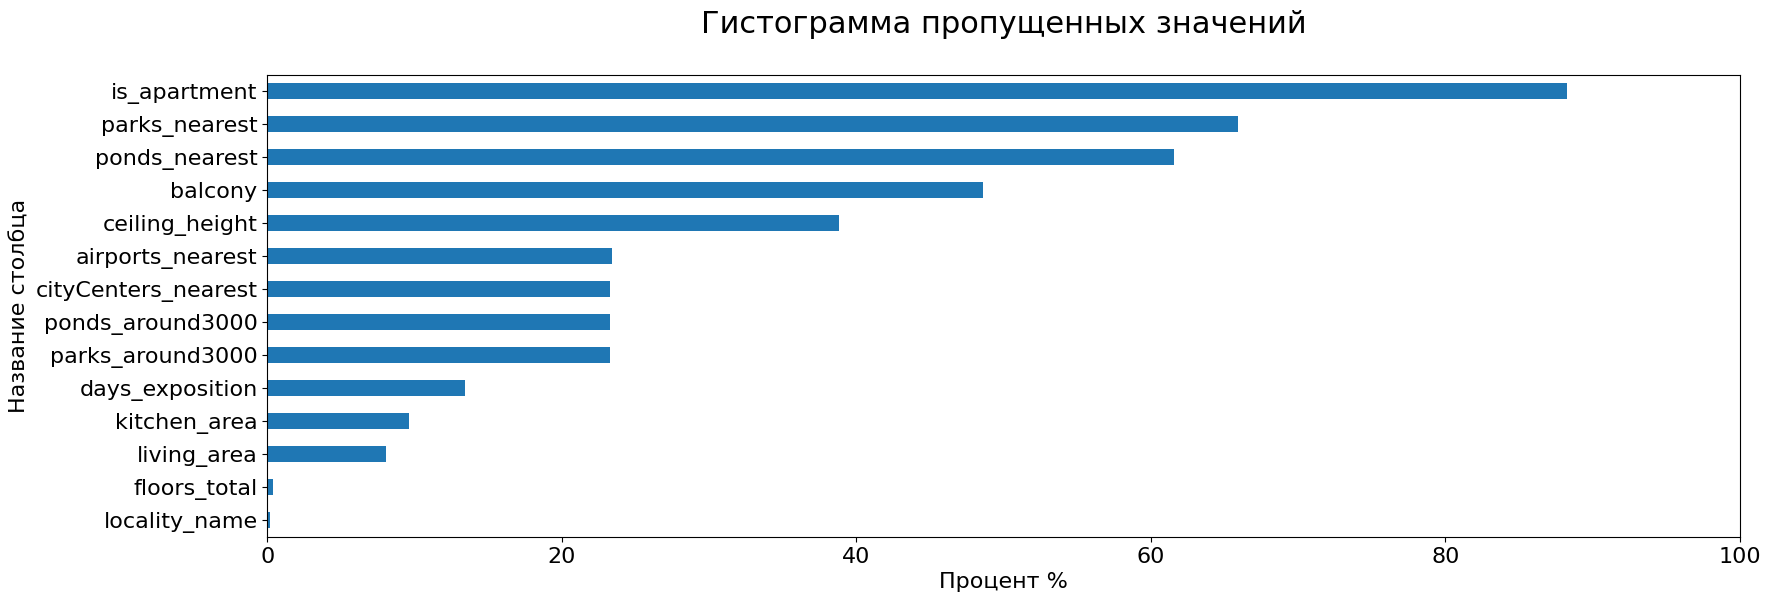

In [6]:
pass_value_barh(data)

* **сeiling_height.** 

Высота потолка. Скорее всего пропуски в этом столбце возникли по той причине, что человек просто не знает высоты своего потолка. 

Так как сведений о районе\микрорайоне, где расположена квартира информации нет, заменим высоту потолков на моду\медиану.

Считаем медианное значение

In [7]:
data['ceiling_height'].median()

2.65

Считаем самое распространенное значение. Для этого сначала выведем колличество квартир с потолками каждого вида.

In [8]:
data['ceiling_height'].value_counts()

ceiling_height
2.50    3515
2.60    1646
2.70    1574
3.00    1112
2.80     993
        ... 
5.00       1
2.20       1
2.34       1
3.93       1
3.59       1
Name: count, Length: 183, dtype: int64

Отсюда видно, что квартиры с потолками в 2.5 метра практически в 2 раза более чем распространены чем все остальные, при этом значение не сильно отличается от медианного. Однако потолков выше 2.5 метра все-таки больше. В таком случае заполним пропуски значением медианы.

In [9]:
data['ceiling_height'] = data['ceiling_height'].fillna(2.65)

Убедимся что данные очищены

In [10]:
data['ceiling_height'][data['ceiling_height'].isna()==True].count()

0

* **floors_total** 

Количество этажей в доме. Сначала можно рассмотреть заполнены ли значения этажа на котором расположена квартира или она также пропущена, как и количество этажей.

In [11]:
data["floors_total"].isna().sum()

86

Количество пропусков в этих данных невелико, поэтому можно удалить эти строки с данными.

In [12]:
data.dropna(subset=['floors_total'], inplace=True)

Проверяем отсутствие пропусков

In [13]:
data["floors_total"].isna().sum()

0

* **living_area и kitchen_area** 

Жилая и кухонная площади также имеет пропуски в данных

In [14]:
print('Количество пропусков для living_area:',data['living_area'].isnull().sum())
print('Количество пропусков для kitchen_area:',data['kitchen_area'].isnull().sum())

Количество пропусков для living_area: 1870
Количество пропусков для kitchen_area: 2231


Причем в большинстве случаев kitchen_area также неуказано, когда не указана living_area

In [15]:
print('Количество общих пропусков для living_area и kitchen_area:',\
      (data['living_area'].isnull() & data['kitchen_area'].isnull()).sum())

Количество общих пропусков для living_area и kitchen_area: 1431


К счастью для всех квартир указана общая площадь жилья (это видно по отсутствию пропусков в total_area), а количество пропусков не очень большое и корректно заполнить мы их не можем(все зависит от планировки помещения, у некоторых например может быть несколько ванных комнат и большая кухня, а кому-то хватает и туалета без отдельного помещения для кухни), поэтому мы оставим их как есть.

* **balcony** 

Количество пропусков в данных с балконами превышает практически половину от общего числа квартир. Можно предположить, что балконов просто в данных квартирах просто нет. Заменим значения на нули.

In [16]:
data['balcony'].isna().sum()

11480

In [17]:
data['balcony'] = data['balcony'].fillna(0)

* **locality_name** 

К сожалению названия населенных пунктов нельзя заменить каким-то логичным образом. Будь у нас хотя бы название аэропорта, то можно было строить какие-то предположения. Кроме того пропуски не многочисленны, поэтому можно оставить как есть.

In [18]:
data['locality_name'].isna().sum()

48

* **parks_around3000, parks_nearest, ponds_around3000, ponds_nearest,cityCenters_nearest,airports_nearest** 

Рассмотрим количество пропусков в данных о водоемах, прудах и расстоянии до аэропорта и центра

In [19]:
print('Пропуски в кол. парков:',data['parks_around3000'].isna().sum())
print('Пропуски в расстоянии. до парков:',data['parks_nearest'].isna().sum())
print('Пропуски в кол. прудов:',data['ponds_around3000'].isna().sum())
print('Пропуски в расстоянии. до прудов:',data['ponds_nearest'].isna().sum())
print('Пропуски в расстоянии. до аэропорта:',data['airports_nearest'].isna().sum())
print('Пропуски в расстоянии. до центра',data['cityCenters_nearest'].isna().sum())

Пропуски в кол. парков: 5508
Пропуски в расстоянии. до парков: 15568
Пропуски в кол. прудов: 5508
Пропуски в расстоянии. до прудов: 14552
Пропуски в расстоянии. до аэропорта: 5532
Пропуски в расстоянии. до центра 5509


Отсюда видно что данные скорее всего имеют пересечения и пропуски появились вследствие технического сбора данных. Подтвердим это ниже.

In [20]:
print(len(data[data['parks_around3000'].isna()&\
                  data['parks_nearest'].isna()&
                  data['ponds_around3000'].isna()&
                  data['ponds_nearest'].isna()&
                  data['airports_nearest'].isna()&
                  data['cityCenters_nearest'].isna()]))

5508


Как либо корректно заполнить пропуски мы не можем, потому что информация может отсутствовать как по причине отсутствия например парков, так и просто потому что собрать информацию не удалось(например населенный пункт очень маленький). Единственное что мы можем заполнить, так это те расстояния до парков и прудов, где указано колличество. Ведь там говорится о парках и прудах в радиусе 3км.

In [21]:
print(data.loc[data['parks_around3000']>0,'parks_nearest'].isna().sum())
print(data.loc[data['ponds_around3000']>0,'ponds_nearest'].isna().sum())

0
0


Как видно выше пропуски в таких данных отсутствуют, поэтому придется оставить пропуски как есть.

* **days_exposition** 

Пропуски в длительности размещения объвления могут быть по той причине, что оно ещё активно. Поэтому оставим данные как есть.

* **is_apartment** 

Аппартаменты. Скорее всего пропуски появились по той причине, что помещение не является аппартаментами. Заполним эти значения False.

In [22]:
data['is_apartment'] = data['is_apartment'].fillna(False)

C:\Users\Dasha\AppData\Local\Temp\ipykernel_16776\2052809825.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['is_apartment'] = data['is_apartment'].fillna(False)


In [23]:
data['is_apartment'].isna().sum()

0

Снова выведем информацию о таблице и убедимся в том что пропуски заполнены.

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        23613 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21743 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          23613 non-null  bool   
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          21382 non-null  float64
 13  balcony               23613 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest      18

**Итог:** 

Были удалены пропуски в столбцах:
* ceiling_height - путем замены на медианное значение
* is_apartment - путем замены на False (т.е. на не аппартаменты)

Прочие столбцы с пропусками остались без изменений, т.к. нет корректного способы замены пропусков

### Изменение типов

Прежде всего имеет смысл изменить тип столбцов с балконов и количество этажей на целые. Так как у нас не может быть половина балкона или 3,5 этажное здание.

In [25]:
data['balcony'] = data['balcony'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')

Также приведем first_day_exposition к типу datatime для упрощенной работы с ним в дальнейшем

In [26]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        23613 non-null  float64       
 6   floors_total          23613 non-null  int32         
 7   living_area           21743 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          21382 non-null  float64       
 13  balcony              

**Итог:** Был изменен тип столбцов first_day_exposition на datatime и balcony, floors_total на int для более удобной работы

#### Поиск дубликатов

Рассмотрим неявные дубликаты которые могут встретиться в столбце с названием поселений.

In [28]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Так как реальна ситуация когда небольшие поселения имеют такое же название как и большие города. Создадим новый столбец с типом города, убрав его из основного названия.

In [29]:
cities = [
       'Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург'
]

In [30]:
location_list = [
    'городской поселок ','городской посёлок ',
    'посёлок городского типа имени ','поселок городского типа ','посёлок городского типа ',
    'коттеджный поселок ','коттеджный посёлок ',
    'поселок станции ','посёлок станции ',
    'посёлок при железнодорожной станции ',
    'садоводческое некоммерческое товарищество ','садовое товарищество ',
    'деревня ','село ','поселок ','посёлок ']

In [31]:
for loc in location_list:
    mask = (data['locality_name'].str.contains(loc, na=False))
    data.loc[mask, 'locality_type'] = loc
    data.loc[mask,'locality_name'] = data.loc[mask,'locality_name'].replace(loc, '', regex=True)
    
for city in cities:
    mask = (data['locality_name'].str.contains(city, na=False))
    data.loc[mask, 'locality_type'] = 'город'
    
data.loc[data['locality_name'].isna(), 'locality_type'] = np.nan
data['locality_type'] = data['locality_type'].str.rstrip()

Заменим неявные дубликаты в новом столбце

In [32]:
data['locality_type'] = data['locality_type'].replace({
    'поселок городского типа': 'посёлок городского типа',
    'городской поселок': 'городской посёлок',
    'коттеджный поселок': 'коттеджный посёлок',
    'поселок станции': 'посёлок станции',
    'садоводческое некоммерческое товарищество': 'садовое товарищество',
    'поселок':'посёлок'
})

Проверим на корректность изменения

In [33]:
data[['locality_name','locality_type']].sample(7)

,locality_name,locality_type
23661,Санкт-Петербург,город
14140,Санкт-Петербург,город
12881,Сосновый Бор,город
15901,Колпино,город
23053,Санкт-Петербург,город
6724,Горбунки,деревня
6897,Санкт-Петербург,город


In [34]:
data['locality_type'].unique()

array(['город', 'посёлок', 'городской посёлок', 'посёлок городского типа',
       'деревня', 'садовое товарищество', 'село', nan, 'посёлок станции',
       'посёлок городского типа имени',
       'посёлок при железнодорожной станции', 'коттеджный посёлок'],
      dtype=object)

И приведем все к нижнему регистру, чтобы выявить оставшиеся дубликаты

In [35]:
data['locality_name'] = data['locality_name'].str.lower()

In [36]:
data['locality_name'].sort_values().unique()

array(['агалатово', 'александровская', 'алексеевка', 'аннино', 'аро',
       'барышево', 'батово', 'бегуницы', 'белогорка', 'белоостров',
       'бокситогорск', 'большая вруда', 'большая ижора',
       'большая пустомержа', 'большие колпаны', 'большое рейзино',
       'большой сабск', 'бор', 'борисова грива', 'бугры', 'будогощь',
       'ваганово', 'важины', 'вартемяги', 'вахнова кара', 'вещево',
       'виллози', 'вознесенье', 'возрождение', 'войсковицы', 'войскорово',
       'володарское', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'вырица', 'выскатка', 'высокоключевой', 'высоцк', 'гаврилово',
       'гарболово', 'гатчина', 'гладкое', 'глажево', 'глебычево',
       'глинка', 'гончарово', 'горбунки', 'гостилицы', 'громово',
       'дзержинского', 'дружная горка', 'дружноселье', 'дубровка',
       'елизаветино', 'ефимовский', 'жилгородок', 'жилпосёлок', 'житково',
       'заводской', 'заклинье', 'заневка', 'запорожское', 'зеленогорск',
       'зимитицы', 'ивангород', 'извара'

Проверим дополнительно на наличие полных дубликатов

In [37]:
data.duplicated().sum()

0

Также рассмотрим наличие полных дубликатов по ключевым столбцам

In [38]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'locality_type'],
      dtype='object')

In [39]:
data.drop(['total_images','first_day_exposition','airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000','ponds_nearest','days_exposition'],axis=1).duplicated().sum()

14

Убрав данные о времени публикации, количестве фотографий, а также данные собранные не вручную было обнаружено 14 дубликатов. Удалим их.

In [40]:
data = data.drop_duplicates(subset=['last_price', 'total_area',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'locality_type'])

In [41]:
data.drop(['total_images','first_day_exposition','airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000','ponds_nearest','days_exposition'],axis=1).duplicated().sum()

0

**Итог:**

Был создан новый столбец с типом поселения и изменены неявные дубликаты

Из названия города был убран тип поселения, а также названия были приведены к нижнему регистру.
(например "поселок Мурино" и "Мурино" преобразованы в "посёлок,мурино" и "город,мурино") 

Также были удалены явные дубликаты по ключевым столбцам.

### Добавленые новых столбцов

Добавим новый столбец цены одного квадратного метра - price_per_m

In [42]:
data['price_per_m'] = round(data['last_price']/data['total_area'],2)

Добавим новый столбец день публикации - day_exposition

In [43]:
data['day_exposition'] = data['first_day_exposition'].dt.dayofweek

Добавим новый столбец месяц публикации - month_exposition

In [44]:
data['month_exposition'] = data['first_day_exposition'].dt.month

Добавим новый столбец год публикации - year_exposition

In [45]:
data['year_exposition'] = data['first_day_exposition'].dt.year

Добавим новый столбец тип этажа квартиры - type_floor

In [46]:
def type_floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    if row['floor'] <=0:
        return 'подвальные помещения'
    return 'другой'

In [47]:
data['type_floor'] = data.apply(type_floor, axis=1)
data['type_floor'] = data['type_floor'].astype('category')

Добавим новый столбец расстояние до центра города в километрах - cityCenters_nearest_km

In [48]:
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest']/1000)

Выведем обновленную таблицу

In [49]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_type,price_per_m,day_exposition,month_exposition,year_exposition,type_floor,cityCenters_nearest_km
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2.00,755.00,NaN,город,"120,370.37",3,3,2019,другой,16.00
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11,18.60,1,False,...,0.00,NaN,81.00,посёлок,"82,920.79",1,12,2018,первый,19.00
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5,34.30,4,False,...,2.00,574.00,558.00,город,"92,785.71",3,8,2015,другой,14.00
3,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14,NaN,9,False,...,3.00,234.00,424.00,город,"408,176.10",4,7,2015,другой,7.00
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1.00,48.00,121.00,город,"100,000.00",1,6,2018,другой,8.00


**Итог:**

Были добавлены новые столбцы с данными:

* цена одного квадратного метра жилья
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «первый», «последний», «другой»);
* расстояние до центра города в километрах

### Исследовательский анализ

**total_area, living_area,kitchen_area**

Рассмотрим значения общей площади квартиры, а также их жилую часть и кухню

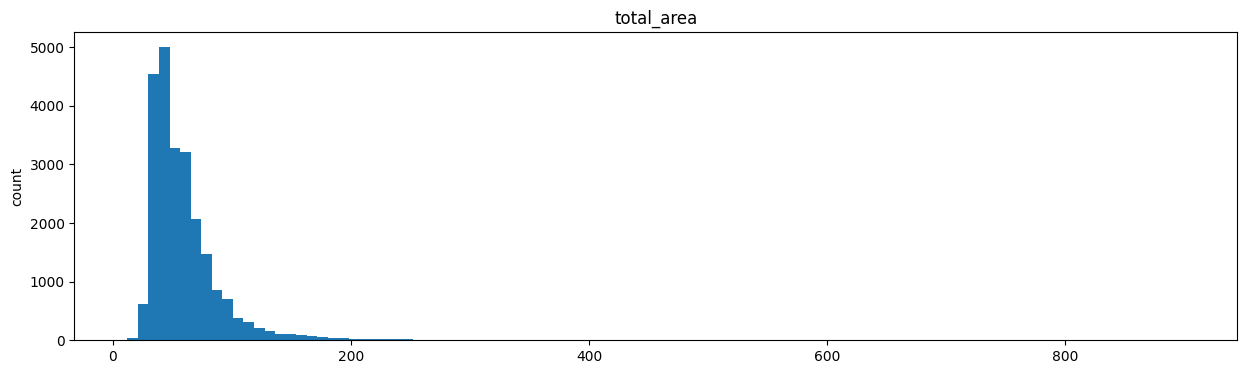

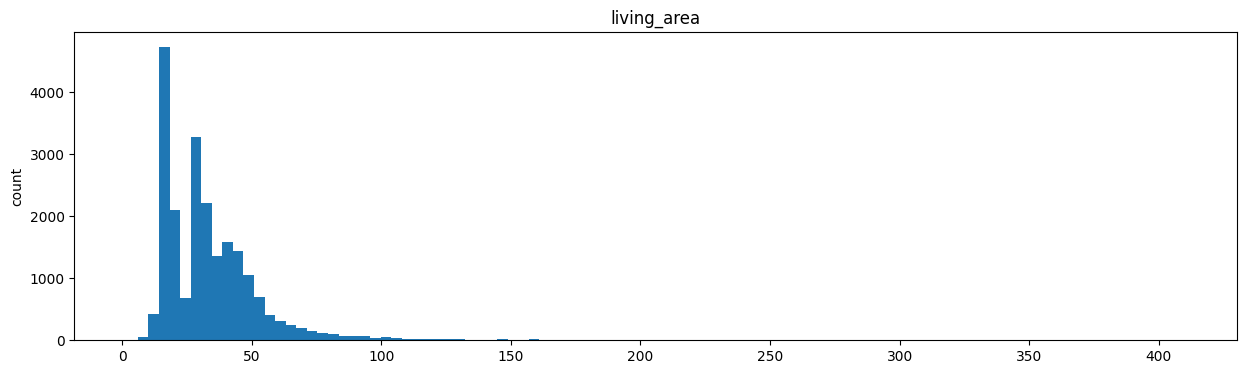

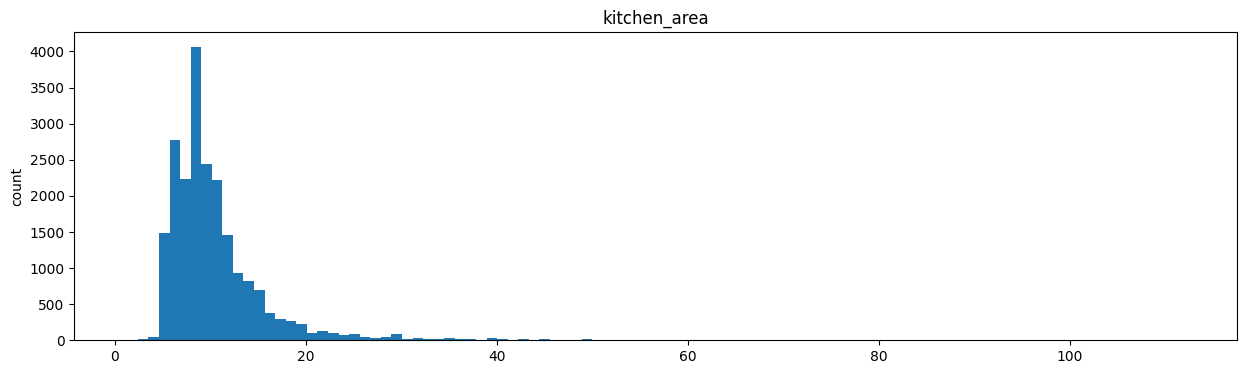

In [50]:
data['total_area'].plot(kind='hist',bins = 100, title = 'total_area',figsize = (15,4))
plt.ylabel('count')
plt.show()
data['living_area'].plot(kind='hist',bins = 100, title = 'living_area',figsize = (15,4))
plt.ylabel('count')
plt.show()
data['kitchen_area'].plot(kind='hist',bins = 100, title = 'kitchen_area',figsize = (15,4))
plt.ylabel('count')
plt.show()

Как видно из гистограммы есть квартиры площадью превыщающие 800 кв.м. Однако основной сегмент рассматриваемых квартир находится в районе 20-250 кв. метров. Скорее всего квартиры или дома большого размера относятся к элитному сегменту и рассматривать их следует отдельно от наших данных. Очистим данные.

In [51]:
data = data.query('total_area < 250')
data = data.query('total_area > 20')

Рассмотрим есть ли кухни превышающие по площади жилые помещения.

In [52]:
more_kitchen = data.query('living_area < kitchen_area')
more_kitchen.shape[0]

354

Да такие данные действительно есть, что для квартир как правило не характерно, это хорошо видно если мы выведем среднее значение для квартир, где кухня меньше жилой площади

In [53]:
more_living = data.query('living_area > kitchen_area')
more_living['kitchen_area'].mean()

10.121677185772299

можно также рассмотреть какой процент от площади квартиры составляет кухня

In [54]:
def kitchen_percentage(row):
    return (row['kitchen_area'] / row['total_area']) *  100

In [55]:
print(f'{round(more_living.apply(kitchen_percentage, axis=1).mean())}%')

18%


И среднее для тех, где кухня больше жилой площади

In [56]:
more_kitchen['kitchen_area'].mean()

25.770960451977402

И процент кухни от общей площади

In [57]:
print(f'{round(more_kitchen.apply(kitchen_percentage, axis=1).mean())}%')

43%


Отсюда видно что эти данные значительно выбиваются и имеет смысл избавиться от них, чтобы скорректировать выбросы и сделать распределения более равномерными.

In [58]:
indices_to_drop = data.index[data.eq(more_kitchen).all(axis=1)]
data.drop(indices_to_drop, inplace=True)

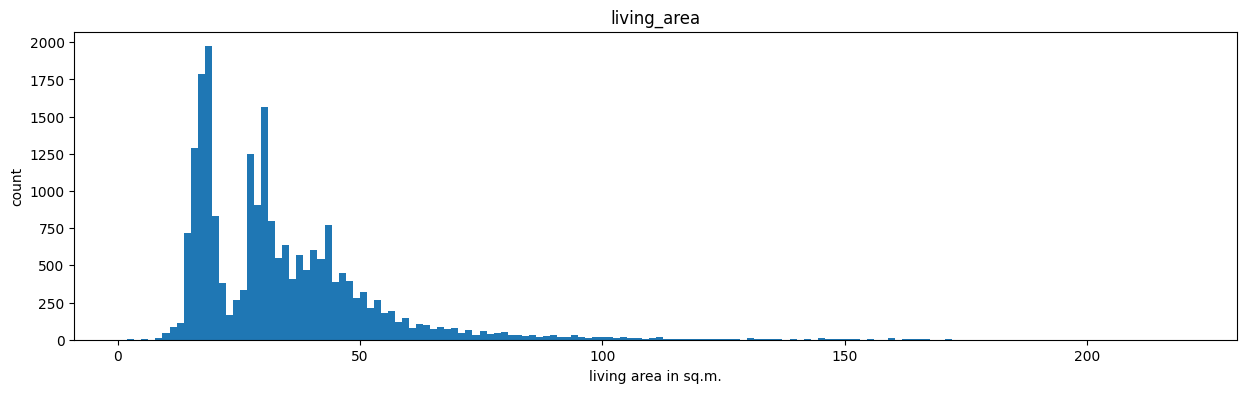

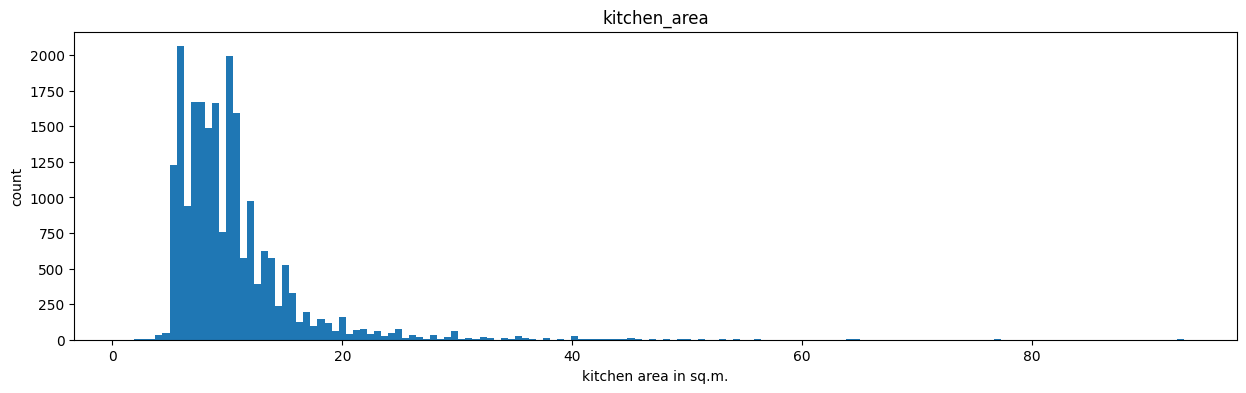

In [59]:
data['living_area'].plot(kind='hist', bins=150, title='living_area',figsize = (15,4))
plt.xlabel('living area in sq.m.')
plt.ylabel('count')
plt.show()

data['kitchen_area'].plot(kind='hist', bins=150, title='kitchen_area',figsize = (15,4))
plt.xlabel('kitchen area in sq.m.')
plt.ylabel('count')
plt.show()

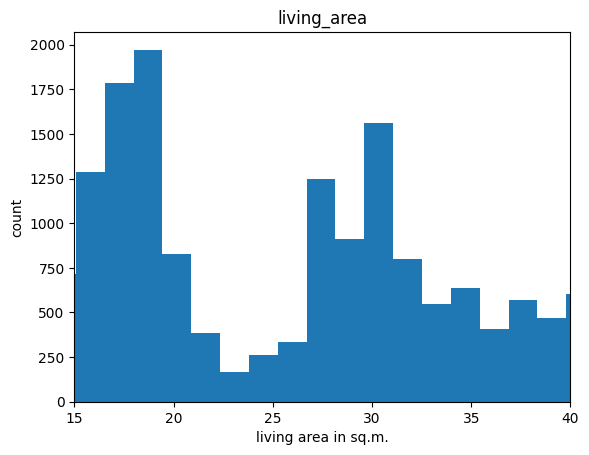

In [60]:
data['living_area'].plot(kind='hist',bins = 150, title = 'living_area',xlim = (15,40))
plt.xlabel('living area in sq.m.')
plt.ylabel('count')
plt.show()

Интересно что есть очень небольшое количество квартир с площадью жилых помещений от 18-30 кв метров, но зато очень много с теми где площадь около 18. Скорее всего это просто специфика данной выборки и сделать выборку более равномернйо не представляется возможным.

Рассмотрим крайние значения для площадей

In [61]:
data[['total_area','living_area','kitchen_area']].apply(['count', 'min', 'median', 'max'])  

,total_area,living_area,kitchen_area
count,"23,370.00","21,531.00","21,186.00"
min,20.10,2.00,1.30
median,52.00,30.00,9.00
max,249.90,220.00,93.20


Можно увидеть, что имеются квартиры, где площадь жилых помещений и кухни крайне мала по сравнению с общей площадью, и наоборот есть такие помещения где сумарная площадь кухни и жилых помещений больше чем основная площадь.
Отбросим эти значения

In [62]:
delete_data = data[data['total_area'] < (data['living_area'] + data['kitchen_area'])].index
print("Кухня+жилое > общей:", delete_data.shape[0])

Кухня+жилое > общей: 64


In [63]:
data.drop(delete_data, inplace=True)

In [64]:
delete_data = data[(data['kitchen_area']/data['total_area']*100) < 8].index
print("Кухня < 10 общей:", delete_data.shape[0])

Кухня < 10 общей: 194


In [65]:
data.drop(delete_data, inplace=True)

In [66]:
delete_data = data[(data['living_area']/data['total_area']*100) < 30].index
print("Жилое < 40 общей:", delete_data.shape[0])

Жилое < 40 общей: 147


In [67]:
data.drop(delete_data, inplace=True)

**Цена квартиры**

Рассмотрим распределение цены

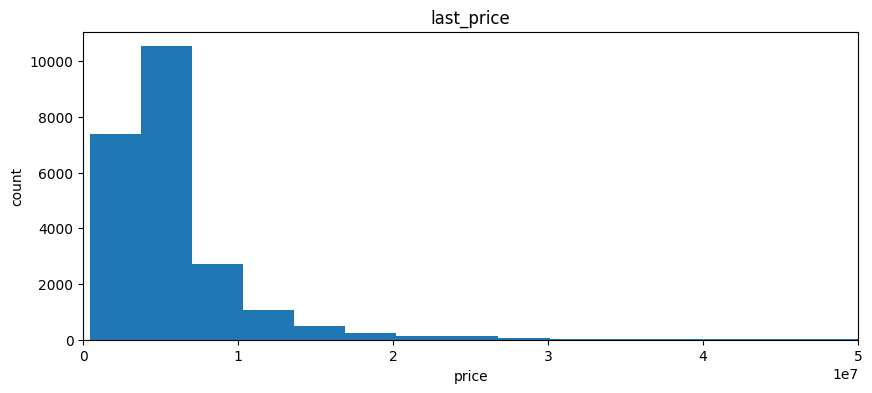

In [68]:
data['last_price'].plot(kind='hist',bins=100,title='last_price',figsize=(10,4))
plt.xlabel('price')
plt.ylabel('count')
plt.xlim(0,0.5*10**8)
plt.show()

Эта гистограмма показывает что распределение близко к нормальному, однако наблюдаются выбросы. Рассмотрим значения на квартилях.

In [69]:
data['last_price'].describe()

count        22,965.00
mean      6,071,301.18
std       6,783,736.65
min         430,000.00
25%       3,400,000.00
50%       4,600,000.00
75%       6,650,000.00
max     330,000,000.00
Name: last_price, dtype: float64

In [70]:
print(f"99.5%: {data['last_price'].quantile(0.995)}")

99.5%: 39900000.0


In [71]:
print('Количество квартир с ценой выше чем 99.5% выборки:',\
      data.query('last_price > 40000000.0').shape[0])

Количество квартир с ценой выше чем 99.5% выборки: 102


In [72]:
print(f"0.1%: {data['last_price'].quantile(0.01)}")

0.1%: 1000000.0


In [73]:
print('Количество квартир с ценой ниже чем 0.1% выборки:',\
      data.query('last_price < 1000000').shape[0])

Количество квартир с ценой ниже чем 0.1% выборки: 220


Как видно, большая часть квартир не превышает по цене в 1 000 000 и стоит не меньше 40 000 000. Имеет смысл удалить редкие данные из нашей выборки

In [74]:
delete_data = data.query('last_price >= 40_000_000').index
data.drop(delete_data, inplace=True)

delete_data = data.query('last_price <= 1_000_000').index
data.drop(delete_data, inplace=True)

**Количество комнат**

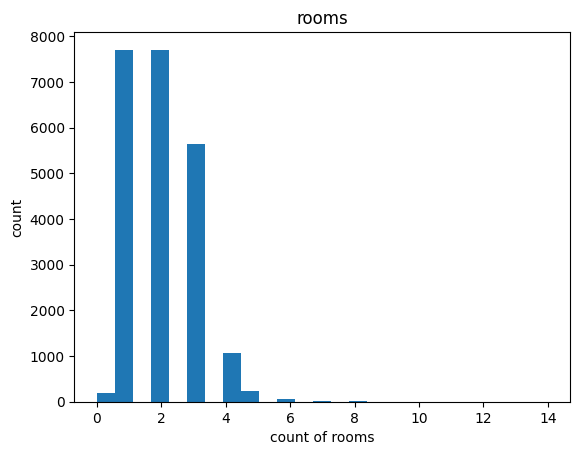

In [75]:
data['rooms'].plot(kind='hist',bins=25,title='rooms');
plt.xlabel('count of rooms')
plt.ylabel('count')
plt.show()

Большинство квартир имеют квартиры с количеством комнат до 6, оставшиеся комнаты для нашей выборки крайне редки и на результат исследования не повлияют.

In [76]:
data = data.query('rooms <= 6')

Интересно, что также имеются квартиры с количеством комнат равным 0, к ним относятся например квартиры с открытой планировкой

In [77]:
data[(data['rooms']==0)&(data['open_plan']==True)].shape[0]

56

или студии

In [78]:
data[(data['rooms']==0)&(data['studio']==True)].shape[0]

125

**Высота потолков**

Посмотри какие вообще потолки есть

In [79]:
print(data['ceiling_height'].sort_values().unique())

[  1.     1.2    1.75   2.     2.2    2.25   2.3    2.34   2.4    2.45
   2.46   2.47   2.48   2.49   2.5    2.51   2.52   2.53   2.54   2.55
   2.56   2.57   2.58   2.59   2.6    2.61   2.62   2.63   2.64   2.65
   2.66   2.67   2.68   2.69   2.7    2.71   2.72   2.73   2.74   2.75
   2.76   2.77   2.78   2.79   2.8    2.81   2.82   2.83   2.84   2.85
   2.86   2.87   2.88   2.89   2.9    2.91   2.92   2.93   2.94   2.95
   2.96   2.97   2.98   2.99   3.     3.01   3.02   3.03   3.04   3.05
   3.06   3.07   3.08   3.09   3.1    3.11   3.12   3.13   3.14   3.15
   3.16   3.17   3.18   3.2    3.21   3.22   3.23   3.24   3.25   3.26
   3.27   3.28   3.3    3.31   3.32   3.33   3.34   3.35   3.36   3.37
   3.38   3.39   3.4    3.42   3.44   3.45   3.46   3.47   3.48   3.49
   3.5    3.51   3.52   3.53   3.54   3.55   3.56   3.57   3.58   3.59
   3.6    3.62   3.63   3.65   3.66   3.67   3.68   3.7    3.75   3.78
   3.8    3.83   3.84   3.85   3.87   3.88   3.9    3.95   3.98   4.
   4.06 

In [80]:
len(data[data['ceiling_height']>10])

23

Как видно выше у нас есть очень высокие потолки, выше 10 метров. Логично предположить, что при сборе данных высота потолков была записана некорректно. Имеет смысл задать размер потолка для таких случаев как 0.1

In [81]:
def adjust_height(height):
    if height > 10:
        return height *  0.1
    else:
        return height

In [82]:
data['ceiling_height'] = data['ceiling_height'].apply(adjust_height)

Рассмотрим крайние значения нашей выборки

In [83]:
print('0.5%',data['ceiling_height'].quantile(0.005))
print(data['ceiling_height'].describe())
print('99%',data['ceiling_height'].quantile(0.995))


0.5% 2.5
count   22,585.00
mean         2.69
std          0.22
min          1.00
25%          2.60
50%          2.65
75%          2.70
max         10.00
Name: ceiling_height, dtype: float64
99% 3.75


Отсюда видно что большая часть выборки имеет высоту потолков от 2.5 до 3.7 метров, остальные данные можно считать выбросами.

In [84]:
data = data.query('ceiling_height>=2.5 and ceiling_height<=3.7')

**Тип этажа**

Рассмотрим предпочтения людей по расположению квартиры

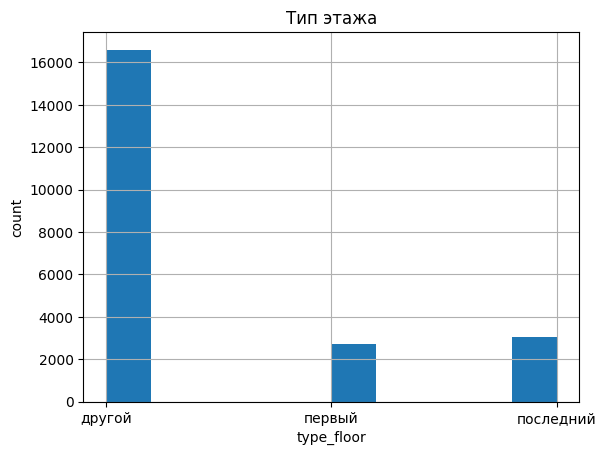

In [85]:
data['type_floor'].hist()
plt.title('Тип этажа')
plt.xlabel('type_floor')
plt.ylabel('count')
plt.show()

In [86]:
data['type_floor'].value_counts()

type_floor
другой       16608
последний     3066
первый        2718
Name: count, dtype: int64

Согласно этим данным, больше людей предпочитают жить на последнем этаже чем на первом, однако абсолютное большинство заселяется на любые другие этажи.

**Колличество этажей**

Теперь рассмотрим в насколько высокоэтажных домах предпочитают жить люди.

In [87]:
data[['floors_total']].value_counts().sort_values()

floors_total
60                 1
33                 1
29                 1
34                 1
36                 3
1                 16
28                21
35                23
26               117
21               158
27               159
11               192
13               218
20               261
22               277
2                308
19               319
8                337
23               345
15               356
24               459
18               486
7                526
14               533
3                597
6                803
17               817
25              1057
4               1094
10              1150
12              1326
16              1344
9               3690
5               5396
Name: count, dtype: int64

Отсюда видно, что большинство заселяют дома высотой 5,9,10,12,16 этажей, что достаточно характерно для советской застройки России. Однако есть незначительное количество людей предпочитающих жить в куда более высокоэтажных зданиях(скорее всего это новостройки).

Посмотрим какую часть от выборки составляют дома высотой более 40 этажей.

In [88]:
print(f'{(data[data["floors_total"] > 40].shape[0] / data.shape[0] *  100):.3f}%')

0.004%


Их количество неначительно, поэтому можно исключить из выборки.

In [89]:
data = data.query('floors_total<=40')

**Расстояние до центра города в метрах; расстояние до ближайшего парка/пруда**

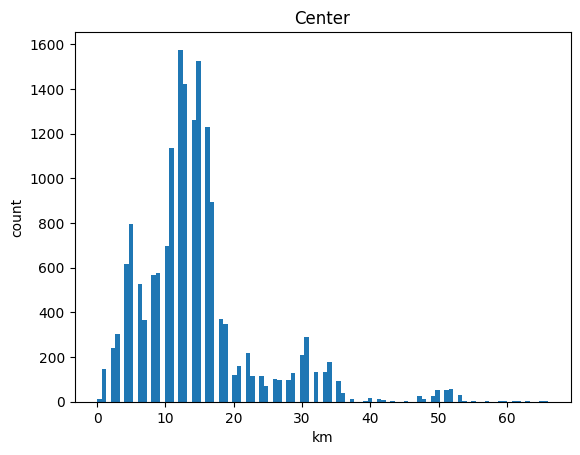

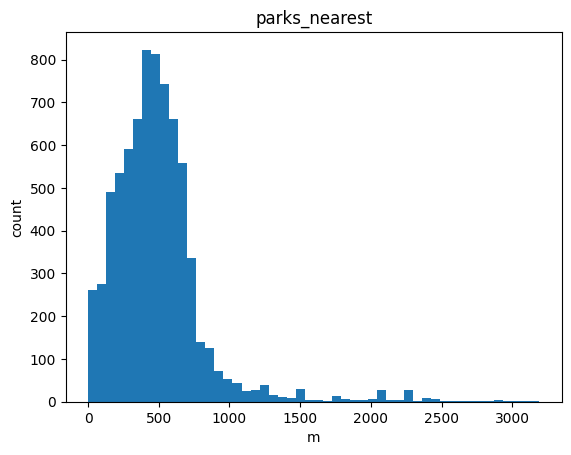

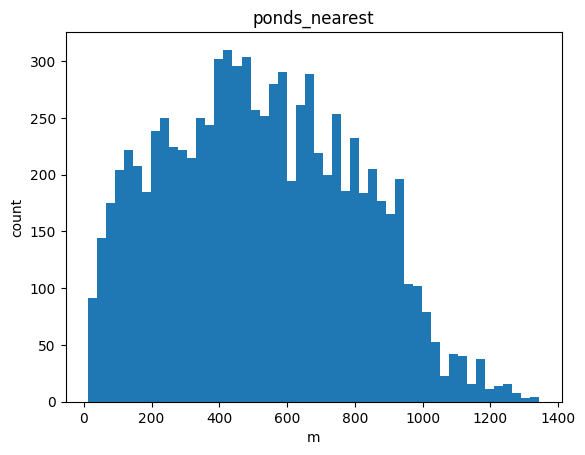

In [90]:
data['cityCenters_nearest_km'].plot(kind='hist',bins=100,title = 'Center')
plt.ylabel('count')
plt.xlabel('km')
plt.show()
data['parks_nearest'].plot(kind='hist',bins=50,title = 'parks_nearest')
plt.ylabel('count')
plt.xlabel('m')
plt.show()
data['ponds_nearest'].plot(kind='hist',bins=50,title = 'ponds_nearest')
plt.ylabel('count')
plt.xlabel('m')
plt.show()

Судя по гистограммам, большинство квартир располагаются в пределах 20 км до центра и менее чем 1,5 километра до ближайшего парка и водоема.
Также наблюдается незначительный провал в значениях близости центра около 8 киломметров и неначительные выбросы для расстояний до ближайшего парка, т.к. в другом столбце таблицы у нас указывается количество парков до 3км. Уберем эти значения.

In [91]:
delete_data = data.query('parks_nearest>3000').index
data.drop(delete_data, inplace=True) 

**days_exposition**

Рассмотрим возможные выбросы в количестве дней размещения объявления

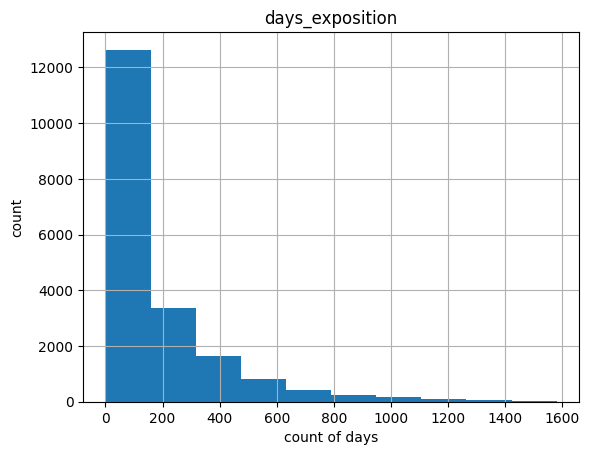

In [92]:
data['days_exposition'].hist()
plt.title('days_exposition')
plt.xlabel('count of days')
plt.ylabel('count')
plt.show()

Из гистограммы видно что большая часть квартир продавалась за первые 3 года, подтвердим это ниже

In [93]:
print("Количество квартир прооданных позже 3 лет:", data[data['days_exposition']>(365*3)].shape[0])

Количество квартир прооданных позже 3 лет: 155


Имеет смысл убрать чрезмерно редкие данные

In [94]:
delete_data = data[data['days_exposition']>(365*3)].index
data.drop(delete_data, inplace=True) 

**Итог:** 

В исходных данных были:
* убраны значения-выбросы в общей площади квартир (менее 20 кв.м. и более 250 кв.м.), 
* убраны значения-выбросы в размере кухни (которые превышали жилую площадь, а также те которые составляли менее 8% от общей площади жилья)
* убраны значения-выбросы в размере жилья (которые сумарно с кухней превышали общую площадь жилья или составляли менее 30% от общей площади жилья)
* убраны значения-выбросы квартир с очень высокой стоимостью и с очень маленькой стоимостью(менее 1 000 000 и более 40 000 000)
* изменены аномальные значения высоты потолка (больше 10 метров), и убраны значения-выбросы (потолки ниже 2.5 и выше 3.7 метров)
* убраны значения-аномалии, где количество парков в радиусе 3000 метров было больше нуля
* убраны квартиры выше 40 этажа.
* убраны редкие значения длительности продажи квартир (более 3 лет)

### Как быстро продавались квартиры.

Сначала рассмотрим всю выборку целиком

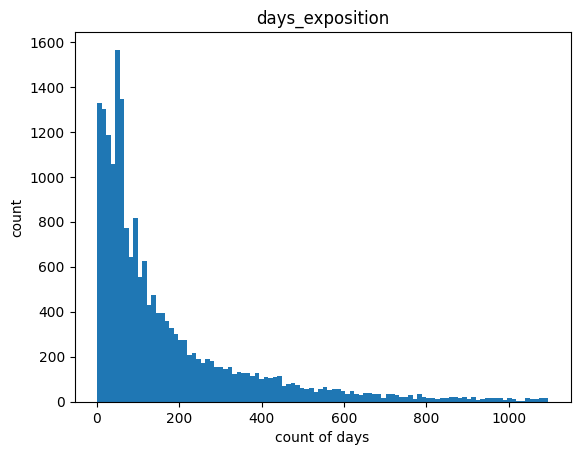

In [95]:
data['days_exposition'].plot(kind='hist',bins=100);
plt.title('days_exposition')
plt.xlabel('count of days')
plt.ylabel('count')
plt.show()

In [96]:
print('Среднее время продажи квартиры:',data['days_exposition'].mean())
print('Медианное время продажи квартиры:',data['days_exposition'].median())

Среднее время продажи квартиры: 170.25009074410164
Медианное время продажи квартиры: 93.0


In [97]:
data['days_exposition'].describe()

count   19,285.00
mean       170.25
std        196.28
min          1.00
25%         44.00
50%         93.00
75%        222.00
max      1,095.00
Name: days_exposition, dtype: float64

In [98]:
print('85% время продажи квартир:',data['days_exposition'].quantile(0.85))

85% время продажи квартир: 348.00000000000006


Имеет смысл также рассмотреть скорость продажи квартир каждый год

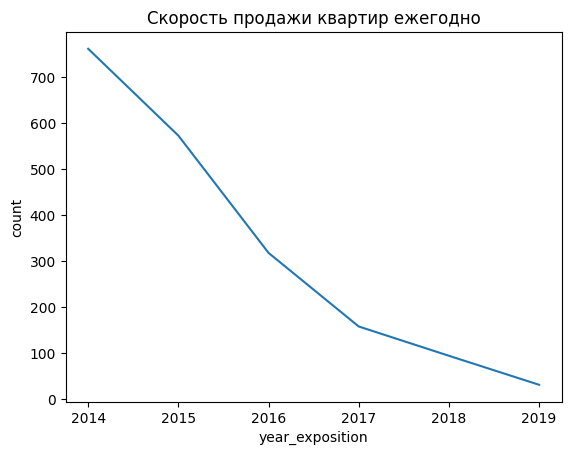

In [99]:
data.groupby('year_exposition')['days_exposition'].mean().plot(kind='line');
plt.title('Cкорость продажи квартир ежегодно')
plt.ylabel('count')
plt.show()

Согласно этому графику видно, что с каждым годом скорость продажи квартир падала, без дальнейшей тендекции к росту

Рассморим частоту времени продажи квартир 

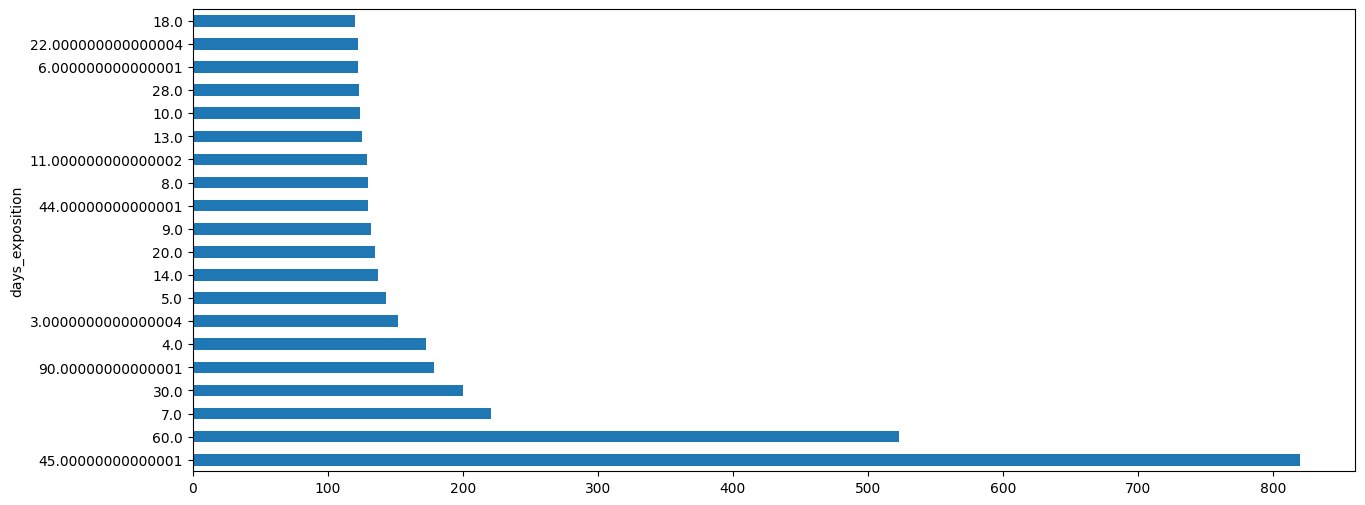

In [100]:
data['days_exposition'].value_counts().head(20).plot(kind = 'barh', figsize = (15,6));

Выделяются 7, 30, 45, 60 и 90 дней которые вероятно имеют техническую причину снятия (неделя, месяц, 1,5 и два месяца)

**Вывод**

Оценивая медианное значение по продажи квартиры, можно утверждать что как минимум половина всех квартир продавалась в первые 3 месяца после публикации. А 75% квартир продавались в течении 2/3 года.

При этом наблюдается тенденция к снижению скорость продажи квартир.

Также выделяются 7, 30, 45, 60 и 90 дней которые вероятно имеют техническую причину снятия (неделя, месяц, 1,5 и два месяца)

### Определение факторов, которые влияют на полную стоимость объекта

##### **Зависимость стоимости от общей площади**

Для наглядность построим график зависимости, а также рассчитаем корреляцию Пирсона

Коэффициент корреляции: 0.7787412534146876


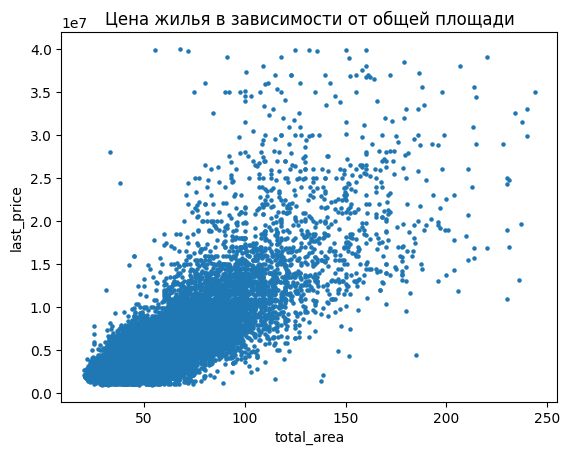

In [101]:
print('Коэффициент корреляции:', data['last_price'].corr(data['total_area']))
data.plot(kind='scatter', x='total_area', y='last_price', title='Цена жилья в зависимости от общей площади',s=5);

Коэффициент корреляции и график показывают что, цена имеет сильную зависимость от общей площади жилья, а это значит что цена **растет** вместе с ростом общей площади жилья

#####  **Зависимость стоимости от жилой площади**

Коэффициент корреляции: 0.6731666304905055


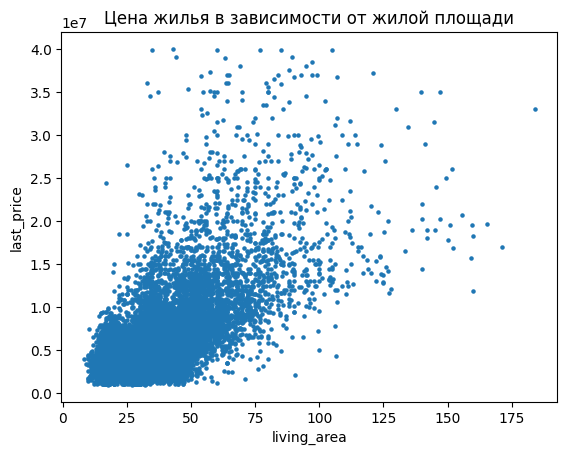

In [102]:
print('Коэффициент корреляции:', data['last_price'].corr(data['living_area']))
data.plot(kind='scatter', x='living_area', y='last_price', title='Цена жилья в зависимости от жилой площади',s=5);

В данном случае зависимость между ценой и жилой площадью помещения чуть ниже, однако цена также **растет** в соответствии с ростом площади.

##### **Зависимость стоимости от площади кухни**

Коэффициент корреляции: 0.616402245499732


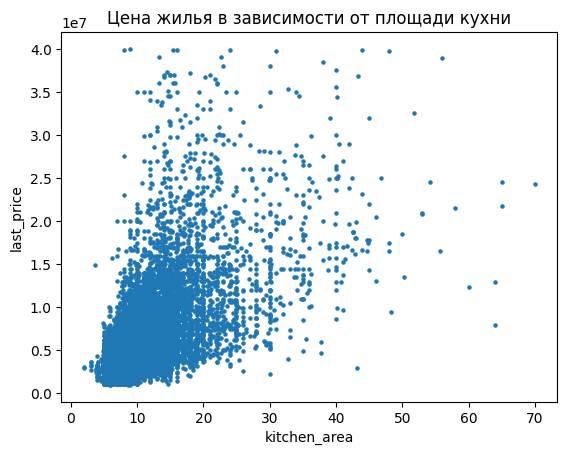

In [103]:
print('Коэффициент корреляции:', data['last_price'].corr(data['kitchen_area']))
data.plot(kind='scatter', x='kitchen_area', y='last_price', title='Цена жилья в зависимости от площади кухни',s=5);

Зависимость между площадью кухни и ценой также имеется, но она ещё ниже чем зависимость от жилой площади или общей площади. Цена все также **растет** с ростом квадратных метров кухни

#####  **Зависимость стоимости от количества комнат**

Коэффициент корреляции: 0.48339080424681813


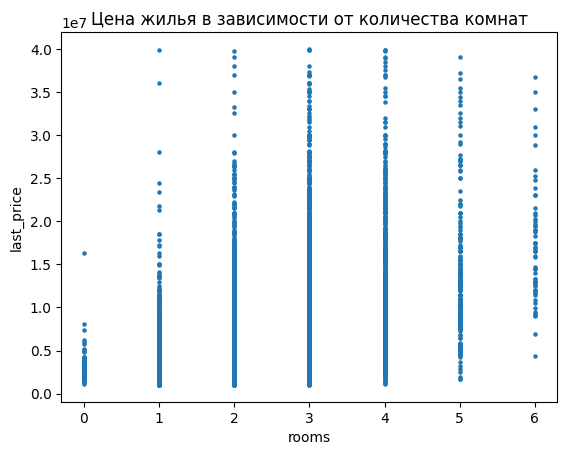

In [104]:
print('Коэффициент корреляции:', data['last_price'].corr(data['rooms']))
data.plot(kind='scatter', x='rooms', y='last_price', title='Цена жилья в зависимости от количества комнат',alpha=1,s=5);

Между количеством комнат и ценой есть слабая корреляция, т.е. цена растет вместе с количеством комнат. Однако такой график на мой взгляд не информативен и будет лучше описать данные с помощью следующего линейного графика.

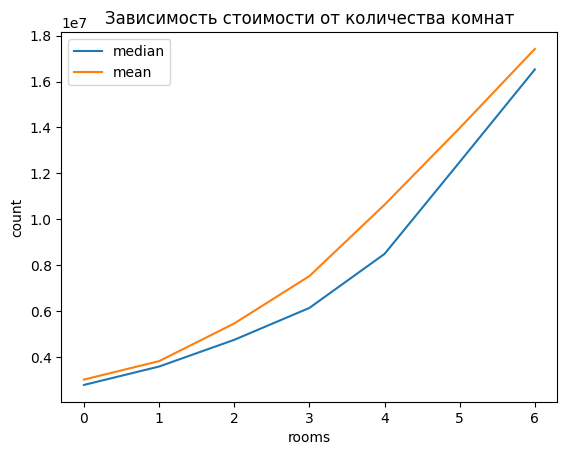

In [105]:
median_price = data.groupby('rooms')['last_price'].median()
mean_price = data.groupby('rooms')['last_price'].mean()
median_price.plot(kind='line', label='median')
mean_price.plot(kind='line', label='mean')
plt.ylabel('count')
plt.title('Зависимость стоимости от количества комнат')
plt.legend()
plt.show()

В данном случае видно куда лучше, что с увеличением количества комнат среднее и медианное значения увеличиваются.

##### **Зависимость стоимость от типа этажа квартиры**

In [106]:
median_price = data.groupby('type_floor')['last_price'].median()
mean_price = data.groupby('type_floor')['last_price'].mean()

C:\Users\Dasha\AppData\Local\Temp\ipykernel_16776\1192071386.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_price = data.groupby('type_floor')['last_price'].median()
C:\Users\Dasha\AppData\Local\Temp\ipykernel_16776\1192071386.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_price = data.groupby('type_floor')['last_price'].mean()


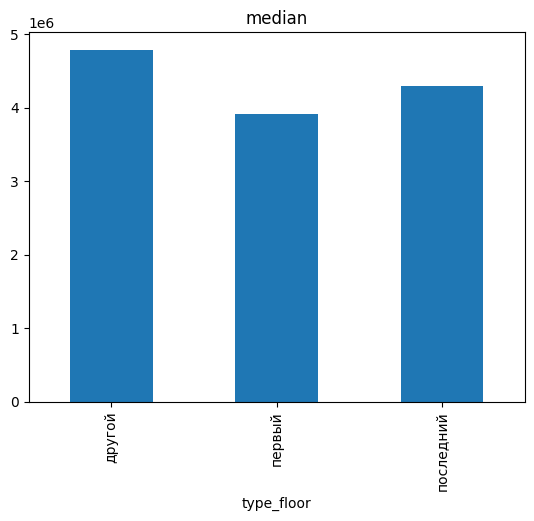

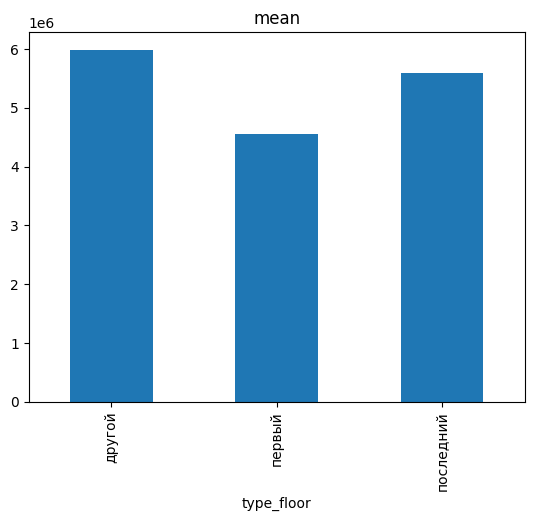

In [107]:
median_price.plot(kind='bar', title='median')
plt.show()
mean_price.plot(kind='bar', title='mean')
plt.show()

Из данного графика можно увидеть, что цена за первый этаж значительно ниже чем за последний или любой другой этаж. Скорее всего это связано с большой проходимостью в коридоре и шумом.

Также можно взглянуть на некатегоризированные данные

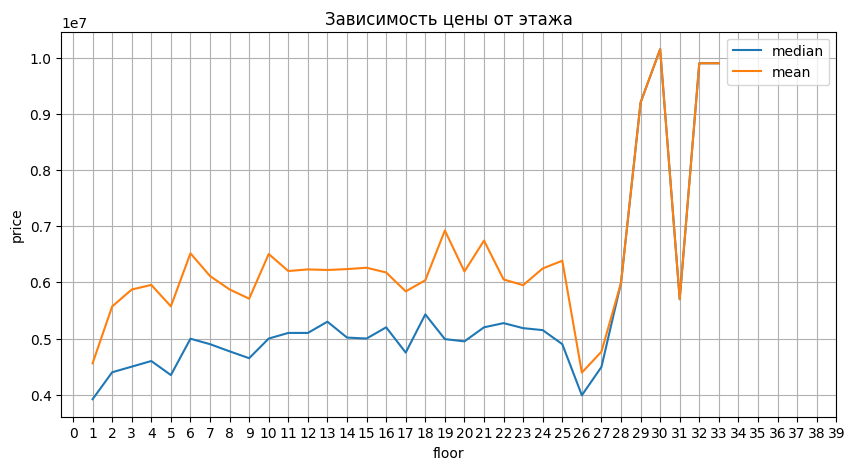

In [108]:
plt.figure(figsize=(10,  5))
median_price = data.groupby('floor')['last_price'].median()
mean_price = data.groupby('floor')['last_price'].mean()
median_price.plot(kind='line', label='median')
mean_price.plot(kind='line', label='mean')
plt.grid(True)
plt.title('Зависимость цены от этажа')
plt.xticks(range(0,40))
plt.ylabel('price')
plt.legend()
plt.show()

На этом графике заметна тенденция к росту цены, вместе с ростом этажа квартиры.

##### **Зависимость стоимости от даты размещения объявления о продаже**

Рассмотрим самый выгодный день для размещения объявления

In [109]:
day_exposition = data.groupby('day_exposition')['last_price'].median()
day_exposition_mean = data.groupby('day_exposition')['last_price'].mean()

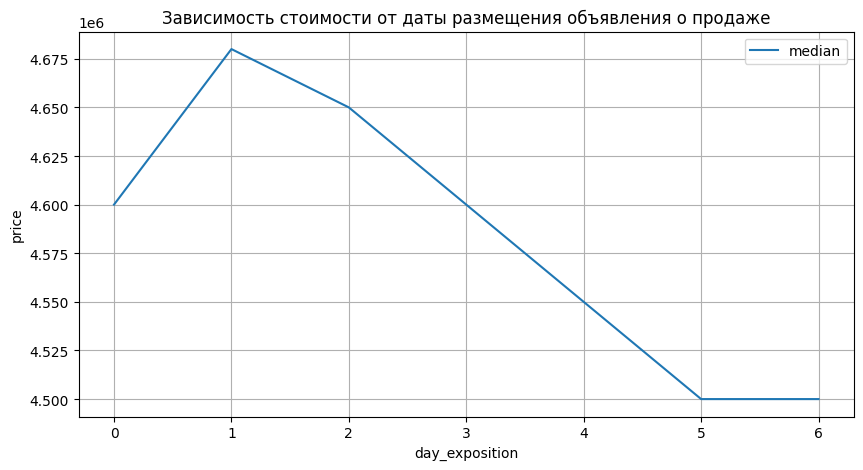

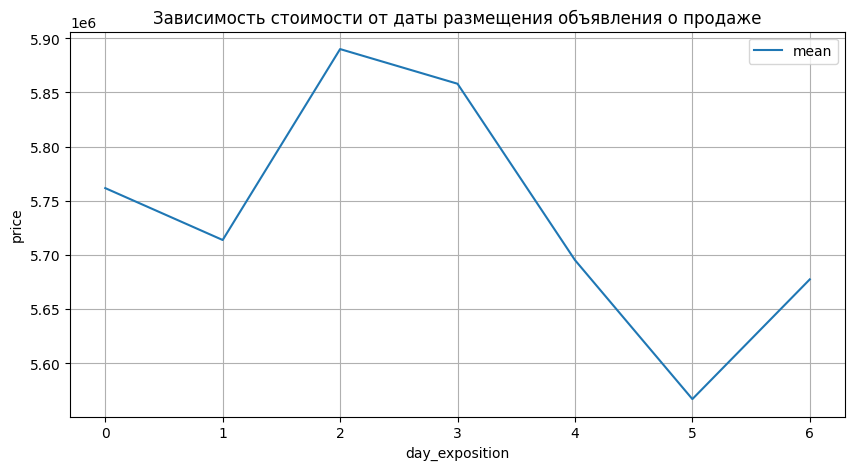

In [110]:
day_exposition.plot(kind='line', label='median',figsize = (10,5))
plt.title('Зависимость стоимости от даты размещения объявления о продаже')
plt.grid(True)
plt.ylabel('price')
plt.legend()
plt.show()
day_exposition_mean.plot(kind='line', label='mean',figsize = (10,5))
plt.grid(True)
plt.title('Зависимость стоимости от даты размещения объявления о продаже')
plt.ylabel('price')
plt.legend()
plt.show()

Исходя из этого графика видно, что во вторник-среду были проданы квартиры за самую дорогую цену, после цена продаж квартир постепенно снижалась вплоть до выходных, после чего увеличивалась. 

Теперь рассмотрим самый выгодный месяц для размещения объявления

In [111]:
month_exposition = data.groupby('month_exposition')['last_price'].median()
month_exposition_mean = data.groupby('month_exposition')['last_price'].mean()

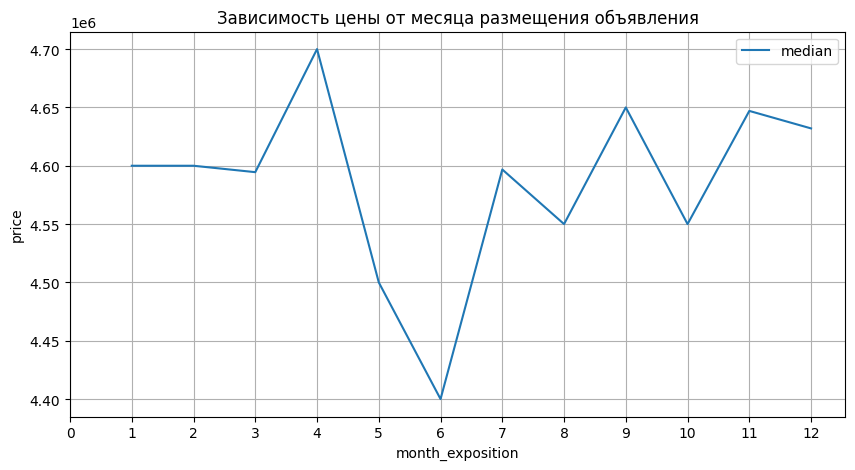

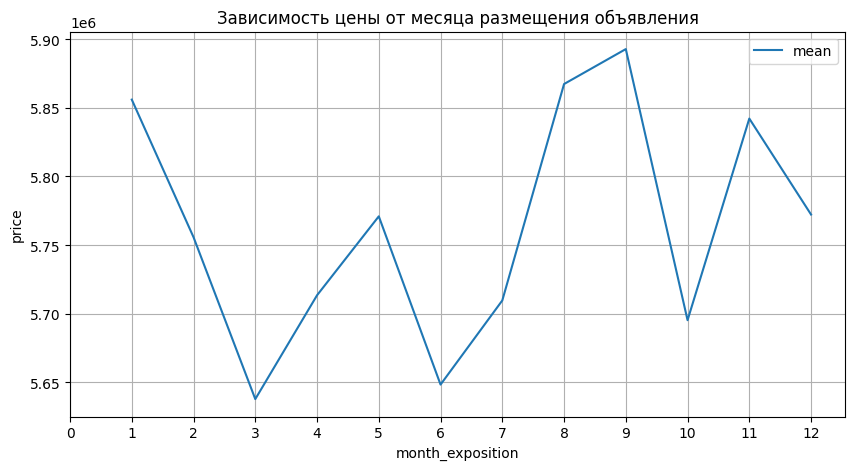

In [112]:
month_exposition.plot(kind='line', label='median',figsize = (10,5))
plt.grid(True)
plt.title('Зависимость цены от месяца размещения объявления')
plt.xticks(range(0,13))
plt.ylabel('price')
plt.legend()
plt.show()
month_exposition_mean.plot(kind='line', label='mean',figsize = (10,5))
plt.grid(True)
plt.title('Зависимость цены от месяца размещения объявления')
plt.xticks(range(0,13))
plt.ylabel('price')
plt.legend()
plt.show()

Согласно этим графикам графику, самыми прибыльными месяцами оказались апрель и сентабрь, а самым невыгодным июнь

Рассмотрим как с годами менялись параметры

In [113]:
year_exposition_mean = data.groupby('year_exposition')['last_price'].mean()
year_total_area_mean = data.groupby('year_exposition')['total_area'].mean()
year_count = data.groupby('year_exposition').size()

Рассмотрим как изменялась средняя цена в течение лет

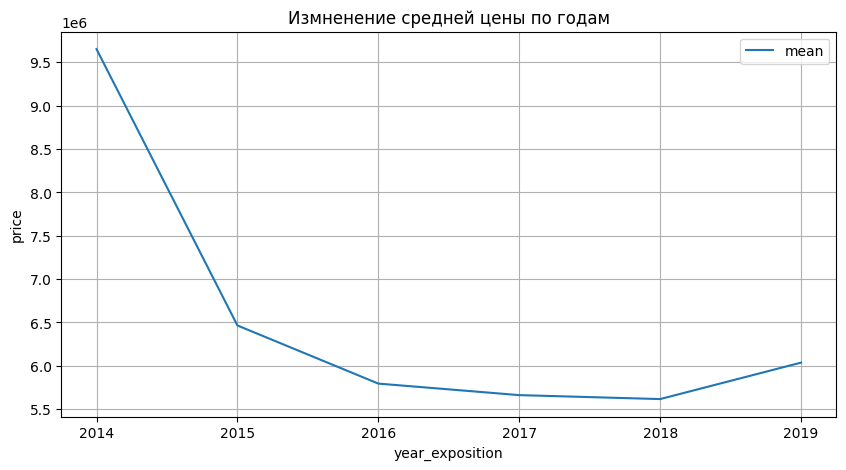

In [114]:
year_exposition_mean.plot(kind='line', label='mean',figsize = (10,5))
plt.title('Измненение средней цены по годам')
plt.grid(True)
plt.ylabel('price')
plt.legend()
plt.show()

Исходя из этого графика самые дорогие квартиры были проданы с объявлений 2014 года, затем цена постепенно снижалась, вплоть до 2018, после чего вновь начался рост средней цены продаж.

Рассмотрим как менялась общая площадь проданных квартир с годами

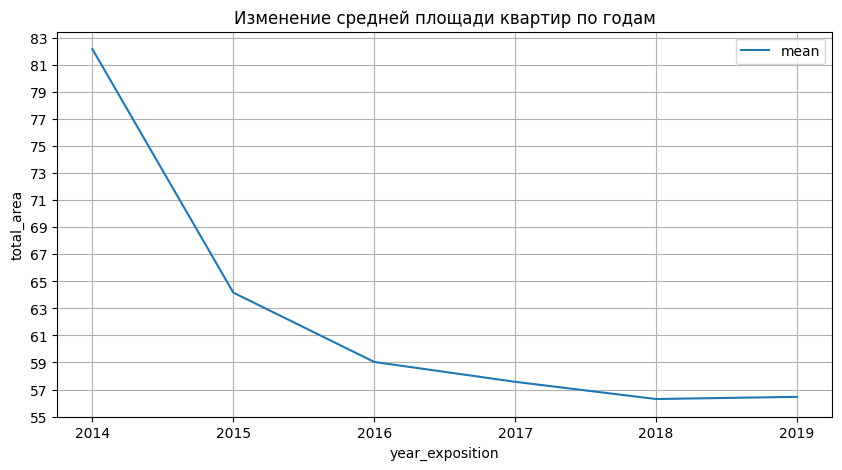

In [115]:
year_total_area_mean.plot(kind='line', label='mean',figsize = (10,5))
plt.title('Изменение средней площади квартир по годам')
plt.grid(True)
plt.ylabel('total_area')
plt.yticks(range(55,85,2))
plt.legend()
plt.show()

C годами общая площадь проданных квартир уменьшалась, оставаясь в течении 2018-2019 года примерно постоянной, в среднем 56-57 кв.м.

Рассмотри насколько часто подавались объявления ежегодно

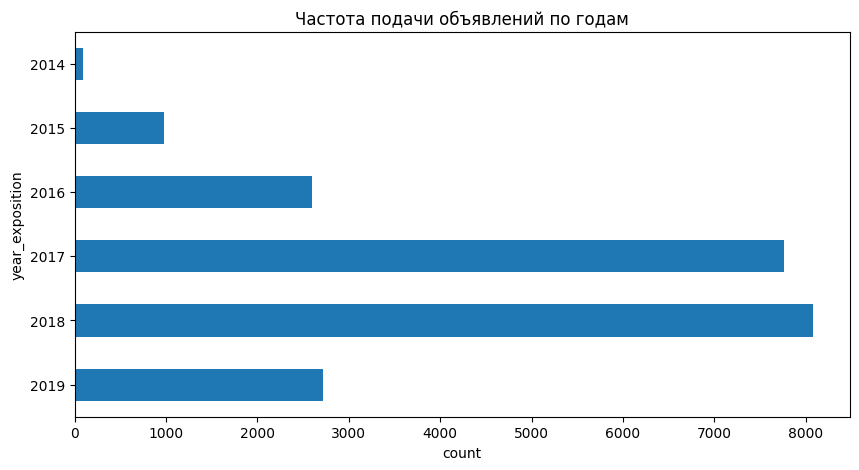

In [116]:
year_count.sort_index(ascending=False).plot(kind='barh', label='mean',figsize = (10,5));
plt.title('Частота подачи объявлений по годам')
plt.xlabel('count')
plt.show()

Пик по количеству продаж достигался в 2017-2018 годах, при этом в 2019 количество проданных квартир значительно упало.

При этом следует учитывать, что у нас имеется около двух с лишним тысяч все-ещё активных объявлений, большая часть которых приходится именно на 2019 год.

In [117]:
data.groupby('year_exposition')['days_exposition'].agg(lambda x: x.isnull().sum())

year_exposition
2014      17
2015      62
2016      58
2017     240
2018     884
2019    1686
Name: days_exposition, dtype: int64

**Вывод:** 

Цена квартиры растет:
* от её общей площади,площади кухни и жилого пространства
* с увеличенеим количества комнат. 

Также важно учитывать, что стоимость квартиры на первом этаже дома куда ниже чем на остальных.
Лучшими днями размещения объявления о продажи будет во вторник-среду, в апреле и сентябре. 

Также в последние несколько лет наблюдается тенденция к снижению цены и соответственно площади проданных квартир, при этом колличество продаж стремительно увеличивается последние 3 года.

#### Определение средей цены одно квадратного метра по рынку

Сначала определим топ 10 населенных пунктов с самым большим числом объявлений

In [118]:
top_cities = data.groupby('locality_name').size().sort_values(ascending=False).head(10).index
top_cities

Index(['санкт-петербург', 'мурино', 'кудрово', 'шушары', 'всеволожск',
       'пушкин', 'колпино', 'парголово', 'гатчина', 'выборг'],
      dtype='object', name='locality_name')

Построим сводную таблицу где с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов

In [119]:
filtered_data = data[data['locality_name'].isin(top_cities)]
(filtered_data
 .groupby('locality_name')['price_per_m'].agg(['count','mean'])
 .sort_values(by='mean',ascending=False)
)

,count,mean
locality_name,,
санкт-петербург,14726,"111,000.99"
пушкин,346,"102,812.33"
кудрово,458,"95,175.44"
парголово,317,"90,132.45"
мурино,572,"86,009.45"
шушары,434,"78,485.29"
колпино,332,"75,489.43"
гатчина,300,"68,772.51"
всеволожск,386,"68,555.12"


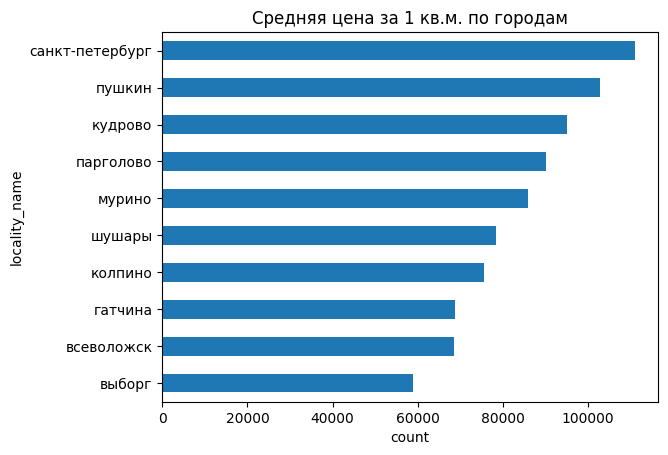

In [120]:
filtered_data.groupby('locality_name')['price_per_m'].mean().sort_values().plot(kind='barh');
plt.title('Средняя цена за 1 кв.м. по городам')
plt.xlabel('count');

**Вывод:** Городом с самой высокой стоимостью за квадратный метр жилья оказался Санкт-Петербург, недалеко от него город Пушкин. Город же с самой низкой стоимостью жилья - Выборг.

### Определение средней стоимости квартир в Санкт-Петербурге в зависимости удаления от центра

Для начала выделим данные из таблицы только по городу Санкт-Петербург, а затем сгруппируем значения по километрам до центра и рассчитаем среднее цен квартир.

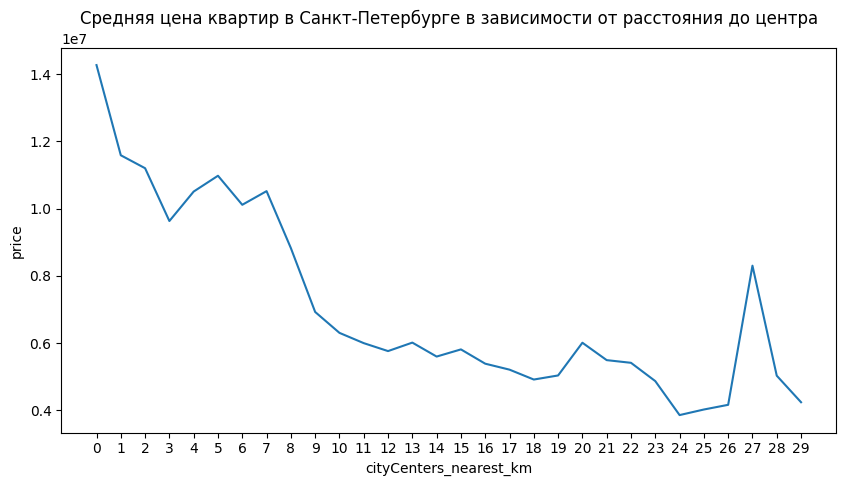

In [121]:
data_city_StP = data[data['locality_name']=='санкт-петербург']
mean_price_StP = data_city_StP.groupby('cityCenters_nearest_km')['last_price'].mean()
mean_price_StP.plot(kind='line',\
                    title = 'Средняя цена квартир в Санкт-Петербурге в зависимости от расстояния до центра',\
                    figsize = (10,5))
plt.ylabel('price')
plt.xticks(range(30))
plt.show()

С увеличением расстояния от центра города цена на квартиры снижается, однако примерно на расстоянии 27 километров наблюдается резкий скачок цены. Рассмотрим причину этого скачка.

In [122]:
data_city_StP[data_city_StP['cityCenters_nearest_km']==27]['last_price'].value_counts()

last_price
14,350,000.00    1
2,250,000.00     1
Name: count, dtype: int64

В этой выборке находится всего 2 значения, максимальное из которых 14 миллионов. Это значение скорее исключение, чем закономерность.

Рассмотрим причины пика на 5 км и провалов на 3 км и 6 км

In [123]:
data_filtered = (data_city_StP[
    (data_city_StP['cityCenters_nearest_km'] ==  3) | \
    (data_city_StP['cityCenters_nearest_km'] ==  5) | \
    (data_city_StP['cityCenters_nearest_km'] ==  6) | \
    (data_city_StP['cityCenters_nearest_km'] ==  7)])

grouped_data_filtered = data_filtered.groupby(['cityCenters_nearest_km','type_floor'])['last_price'].agg(['count','mean'])

grouped_data_filtered['%'] = (
    round(grouped_data_filtered['count']/grouped_data_filtered.groupby('cityCenters_nearest_km')['count'].sum()*100)
)
grouped_data_filtered

C:\Users\Dasha\AppData\Local\Temp\ipykernel_16776\312790581.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data_filtered = data_filtered.groupby(['cityCenters_nearest_km','type_floor'])['last_price'].agg(['count','mean'])


count          mean     %
cityCenters_nearest_km type_floor                           
3.00                   другой        181 10,214,214.36 61.00
                       первый         49  7,439,385.71 16.00
                       последний      69  9,646,726.84 23.00
5.00                   другой        583 11,302,804.75 76.00
                       первый         73  7,347,136.29  9.00
                       последний     116 11,614,818.59 15.00
6.00                   другой        392 10,778,767.71 75.00
                       первый         59  6,869,135.59 11.00
                       последний      73  9,147,152.49 14.00
7.00                   другой        279 11,228,015.11 77.00
                       первый         31  7,749,861.97  9.00
                       последний      54  8,437,296.30 15.00

Из получившейся таблицы видно следующее. 

На 3 и 6 километре 16% и 11% всех записей формируется недорогими первыми этажами, в то время как на 5 и 7 километре, такие записи составляют всего 9% и 8%.

При этом на 5 километре цена за последний этаж даже превышает цену основной группы, в то время как на 3 и 6 километрах она значительно ниже.

**Вывод:**

Таким образом, цена за квартиры снижается с увеличением расстояние от центра.
При этом на 5 и 7 километре наблюдается скачок цен, который характеризован тем, что доля недорогих проданных первых этажей составляет 9% и 8%, а также на 5 километре цены за последние этажы значительно выше чем на других расстояниях.

### Итоги работы

#### Предобработка
**Работа с пропусками** 

Были удалены пропуски в столбцах:
* ceiling_height - путем замены на медианное значение
* is_apartment - путем замены на False (т.е. на не аппартаменты)
Прочие столбцы с пропусками остались без изменений, т.к. нет корректного способы их замены.

**Работа с типом данных** 

Был изменен тип столбцов first_day_exposition на datatime и balcony,floors_total на int для более удобной работы

**Работа с дубликатами**

Были вынесены типы поселений из названия, а также убраны неявные дубликаты вроде поселок и посёлок.
(например "поселок Мурино" и "Мурино" были преобразованы в 'поселок, мурино' и 'город,мурино') 
Были удалены явные дубликаты по ключевым столбцам

**Добавление новых столбцов**

Были добавлены новые столбцы с данными:

* цена одного квадратного метра жилья
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «первый», «последний», «другой»), тип category
* расстояние до центра города в километрах

**Работа с аномалиями и выбросами** 

В исходных данных были:
* убраны значения-выбросы в общей площади квартир (менее 20 кв.м. и более 250 кв.м.), 
* убраны значения-выбросы в размере кухни (которые превышали жилую площадь, а также те которые составляли менее 8% от общей площади жилья)
* убраны значения-выбросы в размере жилья (которые сумарно с кухней превышали общую площадь жилья или составляли менее 30% от общей площади жилья)
* убраны значения-выбросы квартир с очень высокой стоимостью и с очень маленькой стоимостью(менее 1 000 000 и более 40 000 000)
* изменены аномальные значения высоты потолка (больше 10 метров), и убраны значения-выбросы (потолки ниже 2.5 и выше 3.7 метров)
* убраны значения-аномалии, где количество парков в радиусе 3000 метров было больше нуля
* убраны редкие значения длительности продажи квартир (более 3 лет)
* убраны квартиры выше 40 этажа.

#### Анализ
**Оценка скорости продаж квартир** 

Оценивая медианное значение по продажи квартиры, можно утверждать что как минимум половина всех квартир продавалась в первые 3 месяца после публикации. А 75% квартир продавались в течении 2/3 года.
При этом наблюдается тенденция к снижению скорость продажи квартир в последние годы.

**Оценка зависиости цены от различных факторов** 

Цена квартиры растет:
* от её общей площади,площади кухни и жилого пространства
* с увеличенеим количества комнат. 

Также важно учитывать, что стоимость квартиры на первом этаже дома куда ниже чем на остальных.
Лучшими днями размещения объявления о продажи будет во вторник-среду, в апреле и сентябре. 

Также в последние несколько лет наблюдается тенденция к снижению цены и соответственно площади проданных квартир, при этом колличество продаж увеличилась практически в 3-4 раза за последние 3 года.

**Оценка городов с самой высокой стоимостью жилья за квадратный метр** 

Городом с самой высокой стоимостью за квадратный метр жилья оказался Санкт-Петербург около 111.000 рублей за квадратный метр, недалеко от него город Пушкин. 
Город же с самой низкой стоимостью жилья - Выборг около 58 000 за квадратный метр.

**Оценка цены квартиры от расстояния до центра в городе Санкт-Петербург** 

Цена за квартиры снижается с увеличением расстояние от центра. 

При этом на 5 и 7 километре наблюдается скачок цен, который характеризован тем, что доля недорогих проданных первых этажей составляет 9% и 8%, а также на 5 километре цены за последние этажы значительно выше чем на других расстояниях.

#### Наилучшие и наихудшие условия

**Наиболее прибыльные условия:** 

Дороже всего продавать квартиры с большой общей, жилой и кухоннной площадью, с большим колличеством комнат, НЕ на первом этаже на максимально близком расстоянии к центру, а также на 5 и 7 километре.

При этом объявления лучше всего размещать во вторник-среду в апреле и сентябре месяце. 
Самым выгодными городами для продажи города Санкт_Петербург и Пушкин с стоимостью за квадратный метр около 111.000 рублей

ОДНАКО не следует продавать слишком большие квартиры, так как в последние годы лучше всего продаются квартиры площадью 56-57 кв.м.

**Наименее прибыльные условия:** 

Дешевле всего будут продаваться квартиры небольшой общей, жилой и кухонной площади, с маленьким количеством комнат, на первом этаже, на максимально большом расстоянии от центра или не в зоне застройки элитного жилья и дач.

Объявления лучше НЕ размещать с четверга по воскресенье в июне месяце.

Из топа самых популярных городов НЕ выгодно продавать квартиры в городе выборг, где цена за квадратный метр не превышает 58.000 рублей.